In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [23]:
beta = 20
min_dist = 20

In [24]:
def reward_function_dist_to_target(x) -> float:
    omega = 0.3
    
    return beta * np.exp(-1 * (x**2) / (2*(omega**2)))

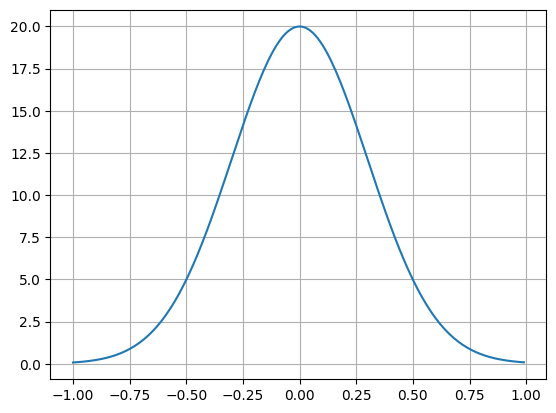

In [25]:
x = np.arange(-1, 1, 0.01)
y = [reward_function_dist_to_target(elem) for elem in x]
plt.plot(x, y)
plt.grid()


In [26]:
# Sigmoid function.
# Idea: Max reward (=1) if distance traveld below minimum distance.
# With increasing distance rapidly dropping reward.
def reward_function_dist_traveled(x):
    c = 0.1 # Stretch factor.
    min = min_dist * 3 # Minimum distance.
    return ((-beta) / (1 + np.e**(-1 * c * (x - min)))) + beta

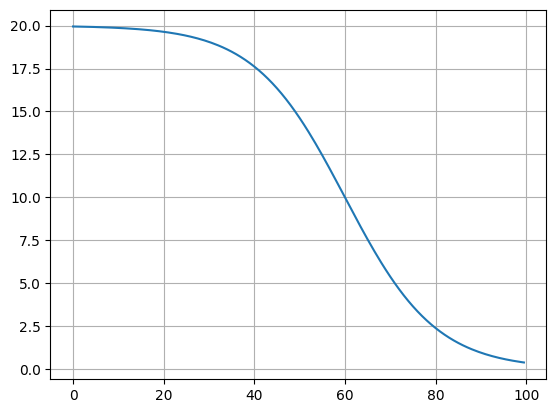

In [27]:
x = np.arange(0, 100, 0.5)
y = [reward_function_dist_traveled(elem) for elem in x]
plt.plot(x, y)
plt.grid()

In [28]:
def get_reward_component_distance_traveled(distance):
    return reward_function_dist_traveled(distance)

def get_reward_component_distance_to_target(distance):
    return reward_function_dist_to_target(distance)

In [29]:
def get_reward(dist_traveled, dist_to_target):
    return 0.7 * get_reward_component_distance_traveled(dist_traveled) + 0.3 * get_reward_component_distance_to_target(dist_to_target)

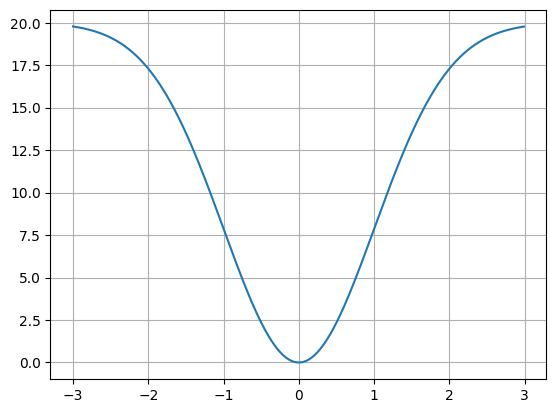

In [30]:
def hm(x) -> float:
    omega = 1
    
    return (-beta * np.exp(-1 * (x**2) / (2*(omega**2)))) + beta

x = np.arange(-3, 3, 0.01)
y = [hm(elem) for elem in x]
plt.plot(x, y)
plt.grid()

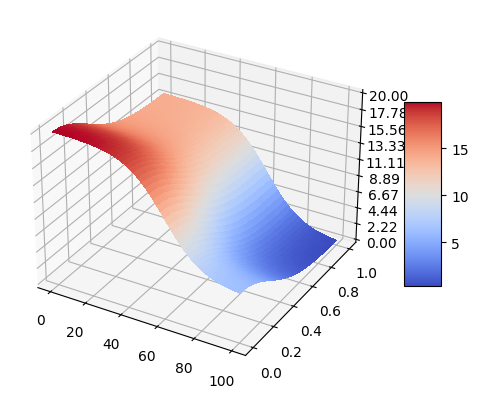

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# x_dist_to_target = np.linspace(0,1,5000)
# y_dist_traveled = np.linspace(0, 50, 5000)

# Make data.
X = np.linspace(0, 100,5000)
Y = np.linspace(0, 1, 5000)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = get_reward(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, beta)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)